# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pandas.io.json import json_normalize

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

In [4]:
# Set up lists
lon = []
lat = []
humidity = []
temp = []
cloud = []
wind = []
country = []
date = []
city_name = []
records = 1

print("Beginning Data Retrieval")
print("------------------------")

# Loop through each city and pull the data
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]['humidity'])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_name.append(response["name"])
        city_record = response["name"]
        print(f"Processing Records {records} | {city_record}")
        
        records += 1
    
    except:
        print("City not found. Skipping...")
        
    pass
print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Records 1 | Ushuaia
Processing Records 2 | Rikitea
Processing Records 3 | Saint Paul Harbor
Processing Records 4 | Arraial do Cabo
City not found. Skipping...
Processing Records 5 | East London
Processing Records 6 | Busselton
Processing Records 7 | Bambous Virieux
Processing Records 8 | Katsuura
Processing Records 9 | La Rioja
Processing Records 10 | Port Blair
Processing Records 11 | Waingapu
Processing Records 12 | Hasaki
Processing Records 13 | São Filipe
Processing Records 14 | Kumul
Processing Records 15 | Salalah
Processing Records 16 | Dikson
Processing Records 17 | Hilo
Processing Records 18 | Vao
Processing Records 19 | Pacifica
Processing Records 20 | Taltal
Processing Records 21 | Saint George
Processing Records 22 | Khatanga
Processing Records 23 | Caravelas
City not found. Skipping...
Processing Records 24 | Jamestown
Processing Records 25 | Punta Arenas
Processing Records 26 | Chulym
Processing Records 27 | Car

Processing Records 228 | Pimentel
Processing Records 229 | Qaqortoq
Processing Records 230 | Wembley
Processing Records 231 | Pierre
Processing Records 232 | Itanhaém
Processing Records 233 | Rawson
Processing Records 234 | São José da Coroa Grande
City not found. Skipping...
Processing Records 235 | Puerto Baquerizo Moreno
City not found. Skipping...
Processing Records 236 | Iquique
Processing Records 237 | Binga
Processing Records 238 | Mahon
Processing Records 239 | Nioro
Processing Records 240 | Hambantota
Processing Records 241 | Stettler
Processing Records 242 | Kahului
City not found. Skipping...
Processing Records 243 | Ponta Delgada
Processing Records 244 | Luena
City not found. Skipping...
Processing Records 245 | Haimen
Processing Records 246 | Bud
Processing Records 247 | Hukuntsi
Processing Records 248 | Pisco
Processing Records 249 | Churapcha
Processing Records 250 | Chokurdakh
Processing Records 251 | Port-Gentil
Processing Records 252 | Carutapera
Processing Records 25

Processing Records 446 | Faanui
City not found. Skipping...
Processing Records 447 | Tura
Processing Records 448 | Daru
Processing Records 449 | Dhone
Processing Records 450 | Nambucca Heads
Processing Records 451 | Port Hawkesbury
Processing Records 452 | Khovd
Processing Records 453 | Quelimane
Processing Records 454 | Boa Esperança
Processing Records 455 | Clyde
Processing Records 456 | Yumen
Processing Records 457 | Grindavik
Processing Records 458 | Mafinga
Processing Records 459 | Turtas
City not found. Skipping...
Processing Records 460 | Lubango
City not found. Skipping...
City not found. Skipping...
Processing Records 461 | Ulaangom
Processing Records 462 | Lompoc
Processing Records 463 | Oriximiná
Processing Records 464 | Frontera
Processing Records 465 | Lata
Processing Records 466 | Murgab
Processing Records 467 | Aksu
Processing Records 468 | Kamaishi
Processing Records 469 | Ayan
Processing Records 470 | La Cruz
Processing Records 471 | Vanavara
Processing Records 472 | O

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}

# Convert to a DataFrame
city_weather_df = pd.DataFrame(weather)
city_weather_df

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,37.40,74,75,25.28,AR,1595600382
1,Rikitea,-23.12,-134.97,67.77,57,0,12.66,PF,1595600384
2,Saint Paul Harbor,57.79,-152.41,55.40,87,90,0.87,US,1595600511
3,Arraial do Cabo,-22.97,-42.03,77.00,61,0,19.46,BR,1595600404
4,East London,-33.02,27.91,73.40,43,0,8.05,ZA,1595600512
...,...,...,...,...,...,...,...,...,...
582,Bulanash,57.28,62.00,68.52,60,49,5.12,RU,1595600628
583,Rosarito,32.33,-117.03,64.63,82,90,3.36,MX,1595600593
584,Inndyr,67.03,14.03,60.80,63,40,6.93,NO,1595600628
585,Zhigansk,66.77,123.37,63.57,75,5,9.64,RU,1595600409


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_cities = (city_weather_df.index.values[city_weather_df["Humidity"] > 100])

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_weather_df = city_weather_df.drop(index=humid_cities, inplace=False)
clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,37.40,74,75,25.28,AR,1595600382
1,Rikitea,-23.12,-134.97,67.77,57,0,12.66,PF,1595600384
2,Saint Paul Harbor,57.79,-152.41,55.40,87,90,0.87,US,1595600511
3,Arraial do Cabo,-22.97,-42.03,77.00,61,0,19.46,BR,1595600404
4,East London,-33.02,27.91,73.40,43,0,8.05,ZA,1595600512


In [8]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_weather_df.to_csv("city_weather.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

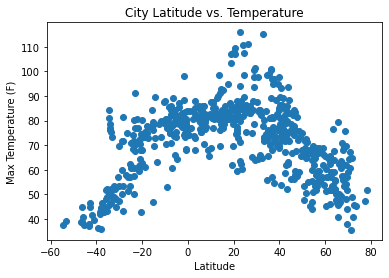

In [9]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Temperature"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Images/LatvsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

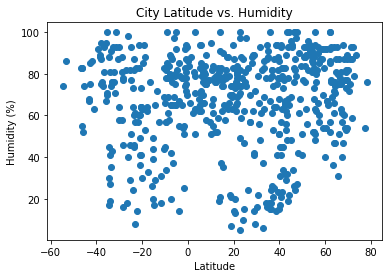

In [10]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Humidity"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Images/LatvsHumid.png")
plt.show()

## Latitude vs. Cloudiness Plot

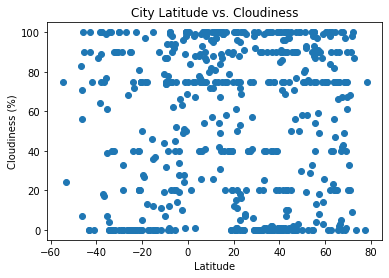

In [11]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Cloudiness"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Images/LatvsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

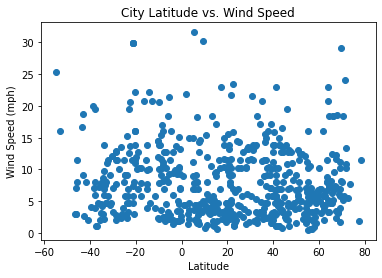

In [12]:
x_values = clean_city_weather_df["Latitude"]
y_values = clean_city_weather_df["Wind Speed"]
plt.scatter(x_values, y_values)


plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("Images/LatvsWindSpeed.png")
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearplt(x_values, y_values, ylabel, coordinates):
    plt.scatter(x_values, y_values)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")

    plt.xlabel("Latitude")
    plt.ylabel(ylabel)

In [14]:
# Create Northern Hemisphere DataFrame
northern_clean_city_weather_df = (city_weather_df.loc[city_weather_df["Latitude"] >= 0])
northern_clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
2,Saint Paul Harbor,57.79,-152.41,55.40,87,90,0.87,US,1595600511
7,Katsuura,35.13,140.30,76.08,91,100,11.27,JP,1595600512
8,La Rioja,42.25,-2.50,82.40,32,69,10.29,ES,1595600512
9,Port Blair,11.67,92.75,83.68,76,75,3.94,IN,1595600512
11,Hasaki,35.73,140.83,73.81,100,75,2.24,JP,1595600513


In [15]:
# Create Southern Hemisphere DataFrame
southern_clean_city_weather_df = (city_weather_df.loc[city_weather_df["Latitude"] < 0])
southern_clean_city_weather_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,37.40,74,75,25.28,AR,1595600382
1,Rikitea,-23.12,-134.97,67.77,57,0,12.66,PF,1595600384
3,Arraial do Cabo,-22.97,-42.03,77.00,61,0,19.46,BR,1595600404
4,East London,-33.02,27.91,73.40,43,0,8.05,ZA,1595600512
5,Busselton,-33.65,115.33,46.63,74,0,8.10,AU,1595600512


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

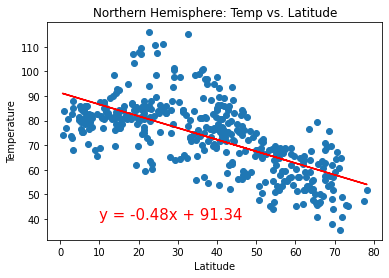

In [16]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Temperature"]
linearplt(x_values, y_values, "Temperature", (10,40))
plt.title("Northern Hemisphere: Temp vs. Latitude")
plt.savefig("Images/NHTempvsLat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

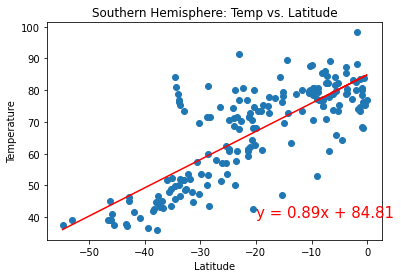

In [17]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Temperature"]
linearplt(x_values, y_values, "Temperature", (-20,40))
plt.title("Southern Hemisphere: Temp vs. Latitude")
plt.savefig("Images/SHTempvsLat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

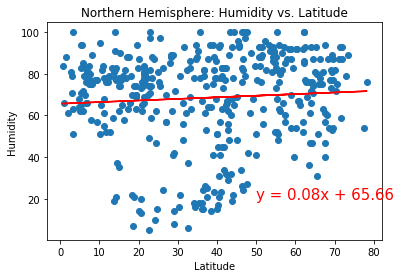

In [25]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Humidity"]
linearplt(x_values, y_values, "Humidity", (50,20))
plt.title("Northern Hemisphere: Humidity vs. Latitude")
plt.savefig("Images/NHHumidvsLat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

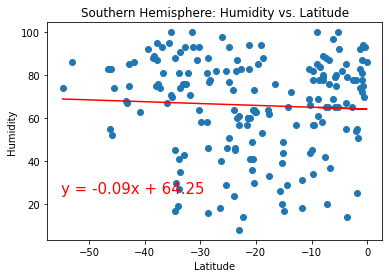

In [26]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Humidity"]
linearplt(x_values, y_values, "Humidity", (-55,25))
plt.title("Southern Hemisphere: Humidity vs. Latitude")
plt.savefig("Images/SHumidvsLat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

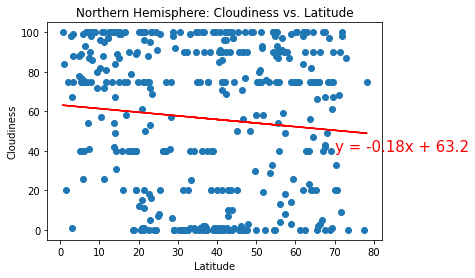

In [27]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Cloudiness"]
linearplt(x_values, y_values, "Cloudiness", (70,40))

plt.title("Northern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("Images/NHCloudvsLat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

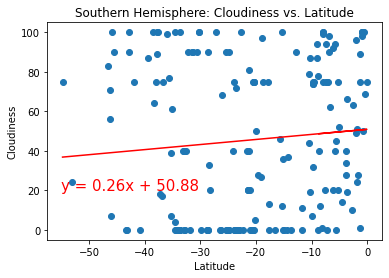

In [28]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Cloudiness"]
linearplt(x_values, y_values, "Cloudiness", (-55,20))

plt.title("Southern Hemisphere: Cloudiness vs. Latitude")
plt.savefig("Images/SHCloudvsLat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

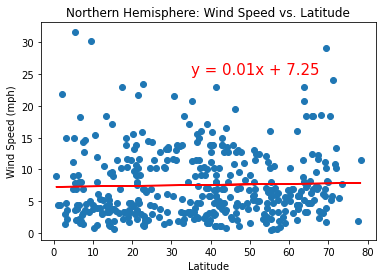

In [31]:
x_values = northern_clean_city_weather_df["Latitude"]
y_values = northern_clean_city_weather_df["Wind Speed"]
linearplt(x_values, y_values, "Wind Speed (mph)", (35,25))

plt.title("Northern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("Images/NHWindvsLat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

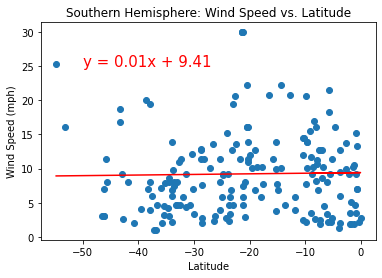

In [30]:
x_values = southern_clean_city_weather_df["Latitude"]
y_values = southern_clean_city_weather_df["Wind Speed"]
linearplt(x_values, y_values, "Wind Speed (mph)", (-50,25))

plt.title("Southern Hemisphere: Wind Speed vs. Latitude")
plt.savefig("Images/SHWindvsLat.png")
plt.show()

In [24]:
# TRENDS OF DATA
# The data proved that temperatures do get higher as you get closer to the equator if you look at the regression
# line for both southern and northern hemispheres's "Temperature vs. Latitude".
# Wind Speed, Cloudiness, Humidity were not affected by the latitude at this time, but it would be interesting to run the data
# throughout the year to see if this changes.
# It is interesting to see that latitude does not seem to affect Cloudiness at all, the scatter plot was extremely
# spread out.